# Project Introduction

The COVID-19 pandemic has been one of the most significant global health crises in modern history, generating an unprecedented amount of data. For data analysts, this provides a unique opportunity to apply analytical techniques to understand and interpret the complex dynamics of a real-world pandemic.

This project undertakes an end-to-end analysis of the COVID-19 pandemic in Japan, utilizing the comprehensive dataset provided by Our World in Data. With a background in biology, this analysis goes beyond surface-level metrics to explore the epidemiological and immunological narratives hidden within the data.

## The primary objectives of this project are:

1. To conduct a thorough exploratory data analysis (EDA) to visualize and understand the key trends, including the evolution of infection waves and the impact of the national vaccination campaign.

2. To identify the key drivers of the pandemic's transmission rate using a Random Forest model for feature importance analysis.

3. To develop and evaluate supervised machine learning models to forecast future cases and classify weekly risk levels, demonstrating the practical application of predictive analytics in public health.

Ultimately, this project serves as a comprehensive case study demonstrating the ability to handle complex, real-world data, derive meaningful insights, and build predictive models to answer critical questions.

---

# EDA AND DATA CLEANING
---

## EDA TO DO LIST

### Initial Inspection
- Data First Look
- Data Structure Overview

### Data Quality
- Data Type
- Missing value analysis
- Duplicate value

### Data Cleaning
- Data type fix
- Missing value fix
- Duplicate fix

### Descriptive Statistics
- Numerical Columns Statistics
- Numerical Relationship
- Time Series Analysis

### Summarize Finding

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import	numpy as np

In [3]:
#Initial Inspection
df = pd.read_csv(r'D:\Project\pyhton_covid_project\Japan Covid Data\raw_data_japan-owid-covid-data.csv')

In [4]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,JPN,Asia,Japan,05/01/2020 00:00,0,0,NaN,0,0,NaN,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1,JPN,Asia,Japan,06/01/2020 00:00,0,0,NaN,0,0,NaN,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
2,JPN,Asia,Japan,07/01/2020 00:00,0,0,NaN,0,0,NaN,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
3,JPN,Asia,Japan,08/01/2020 00:00,0,0,NaN,0,0,NaN,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
4,JPN,Asia,Japan,09/01/2020 00:00,0,0,NaN,0,0,NaN,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
5,JPN,Asia,Japan,10/01/2020 00:00,0,0,0.0,0,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
6,JPN,Asia,Japan,11/01/2020 00:00,0,0,0.0,0,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
7,JPN,Asia,Japan,12/01/2020 00:00,0,0,0.0,0,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
8,JPN,Asia,Japan,13/01/2020 00:00,0,0,0.0,0,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
9,JPN,Asia,Japan,14/01/2020 00:00,0,0,0.0,0,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN


In [5]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1664,JPN,Asia,Japan,26/07/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1665,JPN,Asia,Japan,27/07/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1666,JPN,Asia,Japan,28/07/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1667,JPN,Asia,Japan,29/07/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1668,JPN,Asia,Japan,30/07/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1669,JPN,Asia,Japan,31/07/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1670,JPN,Asia,Japan,01/08/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1671,JPN,Asia,Japan,02/08/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1672,JPN,Asia,Japan,03/08/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
1673,JPN,Asia,Japan,04/08/2024 00:00,33803572,0,0.0,74694,0,0.0,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN


In [6]:
df.shape

(1674, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1674 non-null   object 
 1   continent                                   1674 non-null   object 
 2   location                                    1674 non-null   object 
 3   date                                        1674 non-null   object 
 4   total_cases                                 1674 non-null   int64  
 5   new_cases                                   1674 non-null   int64  
 6   new_cases_smoothed                          1669 non-null   float64
 7   total_deaths                                1674 non-null   int64  
 8   new_deaths                                  1674 non-null   int64  
 9   new_deaths_smoothed                         1669 non-null   float64
 10  total_cases_

note: too many column (67 columns). cant inspect all of it by info (), head(), and tail()

In [8]:
#Create a Function to Inspect the DataFrame
#This function will return a DataFrame with the count of non-null values, null values, amd data types
def inspect_dataframe(data_frame):
    non_null_count = data_frame.count().reset_index()
    non_null_count = non_null_count.rename(columns={'index' : 'column_name', 0: 'non_null_count'})
    non_null_count['null_count'] = data_frame.shape[0] - non_null_count['non_null_count']
    column_type = data_frame.dtypes.reset_index()
    column_type = column_type.rename(columns={'index' : 'column_name', 0:'data_type'})
    dat_inspection = pd.merge(non_null_count, column_type, 'left', left_on= 'column_name', right_on='column_name')
    return dat_inspection.sort_values(by='non_null_count', ascending=False)

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
inspect_dataframe(df)

,column_name,non_null_count,null_count,data_type
0,iso_code,1674,0,object
1,continent,1674,0,object
2,location,1674,0,object
3,date,1674,0,object
4,total_cases,1674,0,int64
5,new_cases,1674,0,int64
7,total_deaths,1674,0,int64
10,total_cases_per_million,1674,0,float64
8,new_deaths,1674,0,int64
13,total_deaths_per_million,1674,0,float64


### Note: 
1. There are columns that contain a lot of **null values**. 
2. There are a lot of redundand column. 
3. date is not in the right format. for time series analysis better to set date column as index.
### action:
further cleaning needed
1. Drop column that irelevant and, redundand
2. Try to fill null values
3. fix date data types and set date as index

In [10]:
df.date.head(10)

0    05/01/2020 00:00
1    06/01/2020 00:00
2    07/01/2020 00:00
3    08/01/2020 00:00
4    09/01/2020 00:00
5    10/01/2020 00:00
6    11/01/2020 00:00
7    12/01/2020 00:00
8    13/01/2020 00:00
9    14/01/2020 00:00
Name: date, dtype: object

**Note**: date in %d/%m/%Y %H:%M format

In [11]:
#drop irrelevant and redundand columns
columns_to_drop = [
    'iso_code',
    'continent',
    'new_cases',
    'new_deaths',
    'new_deaths_per_million',
    'total_cases_per_million',
    'new_cases_per_million',
    'total_deaths_per_million',
    'new_cases_smoothed_per_million',
    'tests_units',
    'new_tests',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_smoothed_per_thousand',
    'new_people_vaccinated_smoothed_per_hundred',
    'new_vaccinations_smoothed_per_million',
    'total_boosters_per_hundred',
    'hosp_patients_per_million',
    'icu_patients_per_million',
    'people_fully_vaccinated_per_hundred',
    'people_vaccinated_per_hundred',
    'total_vaccinations_per_hundred',
    'new_deaths_smoothed_per_million',
    'excess_mortality_cumulative_per_million',
    'excess_mortality_cumulative_absolute',
    "weekly_icu_admissions",
    "weekly_icu_admissions_per_million",
    "weekly_hosp_admissions",
    "weekly_hosp_admissions_per_million",
    "handwashing_facilities",
    "extreme_poverty",
    'aged_70_older',
    'aged_65_older'
    
]
df = df.drop(columns=columns_to_drop)
df['date'] = pd.to_datetime(df['date'], format= '%d/%m/%Y %H:%M')

In [12]:
inspect_dataframe(df)

,column_name,non_null_count,null_count,data_type
0,location,1674,0,object
1,date,1674,0,datetime64[ns]
2,total_cases,1674,0,int64
4,total_deaths,1674,0,int64
28,hospital_beds_per_thousand,1674,0,float64
25,diabetes_prevalence,1674,0,float64
22,median_age,1674,0,float64
29,life_expectancy,1674,0,float64
31,population,1674,0,int64
30,human_development_index,1674,0,float64


In [13]:
#adding year, month, and day columns for time series analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.day_of_year

#	Set date as index for time series analysis
df.set_index('date', inplace=True)

In [14]:
#Null Inspection
df.head(10).sort_index(ascending=True)

,location,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,hosp_patients,total_tests,new_tests_smoothed,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population_density,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative,excess_mortality,year,month,day_of_year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-05,Japan,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,5
2020-01-06,Japan,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,6
2020-01-07,Japan,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,7
2020-01-08,Japan,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,8
2020-01-09,Japan,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,9
2020-01-10,Japan,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,10
2020-01-11,Japan,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,11
2020-01-12,Japan,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,12
2020-01-13,Japan,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,13


**Note:** There are a lot of null in 2020.  safe to assume that null in early 2020 is represent zero where the outbreak is not happen yet

In [15]:
df.sample(25).sort_index(ascending=True)

,location,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,hosp_patients,total_tests,new_tests_smoothed,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population_density,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative,excess_mortality,year,month,day_of_year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-04,Japan,14839,236.71,492,20.57,0.69,NaN,NaN,156251.0,3185.0,0.07,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.22,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,5,125
2020-05-06,Japan,14839,236.71,492,20.57,0.45,NaN,NaN,158267.0,2884.0,0.07,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.22,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,5,127
2020-06-30,Japan,18390,75.14,971,2.57,1.69,NaN,NaN,390219.0,4200.0,0.02,39.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.93,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,-3.64,-3.39,2020,6,182
2021-02-11,Japan,404990,2210.29,6338,97.71,0.59,NaN,NaN,6984533.0,51035.0,0.04,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.54,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2021,2,42
2021-02-20,Japan,415782,1541.71,6912,82.00,0.73,NaN,NaN,7426565.0,50737.0,0.03,38.8,NaN,NaN,NaN,NaN,NaN,2404.0,2404.0,49.54,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2021,2,51
2021-03-15,Japan,447906,1130.57,8560,47.57,1.05,NaN,NaN,8445731.0,44462.0,0.03,38.8,290275.0,282398.0,7877.0,NaN,NaN,31354.0,30229.0,42.59,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2021,3,74
2021-03-20,Japan,447906,1130.57,8560,47.57,1.12,NaN,NaN,8735284.0,50956.0,0.02,40.4,NaN,NaN,NaN,NaN,NaN,50429.0,47319.0,42.59,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2021,3,79
2021-04-03,Japan,468614,1690.43,9031,31.29,1.28,NaN,NaN,9453345.0,52482.0,0.04,22.7,NaN,NaN,NaN,NaN,NaN,40661.0,18776.0,42.59,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2021,4,93
2021-08-07,Japan,935886,9348.71,15197,9.71,1.39,NaN,NaN,18180813.0,89211.0,0.15,6.8,109748039.0,62405549.0,47342490.0,NaN,1591653.0,1447468.0,592073.0,50.46,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2021,8,219


**Note:**
1. There are a lot of null in 2020
2. columns with word 'total' should have value that dont decrease so save to use fill to replace null
3. columns with value can decrease or increase, null can be filled by use interpolate method
4. after all of null hadling effort, if columns still have a lot of nulls than those columns should be droped

In [16]:
# Null Handling
columns_to_fill = [
    "new_cases_smoothed",
    "new_deaths_smoothed",
    "stringency_index",
    "reproduction_rate",
    "total_tests",
    "new_tests_smoothed",
    "positive_rate",
    "tests_per_case",
    "new_people_vaccinated_smoothed",
    "new_vaccinations_smoothed",
    "total_vaccinations",
    "people_vaccinated",
    "new_vaccinations",
    "people_fully_vaccinated",
    "total_boosters",
    "hosp_patients",
    "icu_patients",
    "excess_mortality_cumulative",
    "excess_mortality"
]

for column in columns_to_fill:
	if 'total' in column:
		df[column] = df[column].ffill()
		df[column] = df[column].fillna(0)
	else:
		df[column] = df[column].interpolate(method='time', limit_direction='forward', limit= 7)

In [17]:
vacinated = [
	"people_vaccinated",
	"people_fully_vaccinated",
]

for column in vacinated:
	df[column] = df[column].ffill()
	df[column] = df[column].fillna(0)
    

In [18]:
inspect_dataframe(df)

,column_name,non_null_count,null_count,data_type
0,location,1674,0,object
1,total_cases,1674,0,int64
3,total_deaths,1674,0,int64
8,total_tests,1674,0,float64
35,day_of_year,1674,0,int32
14,people_fully_vaccinated,1674,0,float64
13,people_vaccinated,1674,0,float64
12,total_vaccinations,1674,0,float64
15,total_boosters,1674,0,float64
30,population,1674,0,int64


In [19]:
df[['stringency_index', 'reproduction_rate', 'positive_rate']].sample(25).sort_index(ascending=True)

,stringency_index,reproduction_rate,positive_rate
date,,,
2020-03-24,40.74,1.64,0.04
2020-03-30,40.74,2.03,0.11
2020-04-07,45.37,1.68,0.11
2020-05-13,47.22,0.48,0.01
2020-07-28,34.26,1.53,0.07
2020-07-30,34.26,1.53,0.07
2021-02-27,50.93,0.86,0.02
2021-03-18,42.59,1.14,0.02
2021-03-29,42.59,1.31,0.03


In [20]:
df[df['total_cases'] > 0].head(10)

,location,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,hosp_patients,total_tests,new_tests_smoothed,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population_density,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative,excess_mortality,year,month,day_of_year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-19,Japan,1,0.14,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,19
2020-01-20,Japan,1,0.14,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,20
2020-01-21,Japan,1,0.14,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,21
2020-01-22,Japan,1,0.14,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,22
2020-01-23,Japan,1,0.14,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,23
2020-01-24,Japan,1,0.14,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,24
2020-01-25,Japan,1,0.14,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,25
2020-01-26,Japan,3,0.29,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,26
2020-01-27,Japan,3,0.29,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.78,347.78,48.2,39002.22,79.37,5.72,11.2,33.7,13.05,84.63,0.92,123951696,NaN,NaN,2020,1,27


In [21]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

## Data Cleaning & Preparation Summary
The initial dataset, sourced from Our World in Data, contains 67 columns and 1,674 daily entries for Japan. A preliminary inspection revealed several data quality issues that required addressing before any meaningful analysis could be performed.

### Initial Data Quality Assessment:

- Data Types: The date column was initially stored as an object and required conversion to a proper datetime format for time-series analysis.

- Missing Values: Significant null values were present across several key columns. This was not due to random error but reflected the real-world timeline of the pandemic. For instance:

- Vaccination-related columns (people_fully_vaccinated_per_hundred, etc.) were null for the early period of the pandemic before vaccines were developed and deployed.

- Metrics like reproduction_rate and positive_rate were also sparse in early 2020 as robust, widespread testing and tracking systems were not yet established.

- Hospitalization data (icu_patients, hosp_patients) was highly inconsistent, with over 87% of its values missing, likely due to reporting challenges.

## Data Cleaning and Transformation Strategy:

To create a robust dataset for analysis, the following cleaning and preparation steps were executed:

- Column Selection: The dataset was streamlined to a subset of 32 relevant columns. Redundant columns (e.g., per-million metrics) and those with nearly all values missing for Japan (e.g., excess_mortality, icu_patients) were dropped from the main modeling dataset to ensure analytical integrity.

- Handling Missing Values (Imputation): A context-aware imputation strategy was employed:

- Logical Zero-Filling: For metrics like people_fully_vaccinated_per_hundred, null values at the beginning of the timeline were logically filled with 0, as this accurately represents the state before the vaccination campaign began.

- Time-based Interpolation: For continuous variables like reproduction_rate, a time-based linear interpolation with a limit of 7 days was used. This method was chosen over a simple forward fill (ffill) to provide a more accurate estimation for small, sporadic gaps without introducing significant bias by fabricating data over long periods.

- Forward Fill: For stateful data that does not change daily, such as the stringency_index, a forward fill with a limit of 7 days was used to carry over the last known value.

After this cleaning process, the resulting DataFrame was internally consistent and ready for exploratory data analysis and predictive modeling.

---

In [35]:
# Create a csv file with the cleaned data
df.to_csv(r'D:\Project\pyhton_covid_project\Japan Covid Data\cleaned_data_japan-owid-covid-data.csv', index=True)

## Ploting the data

Text(0.5, 1.0, 'Total Tests Over Time')

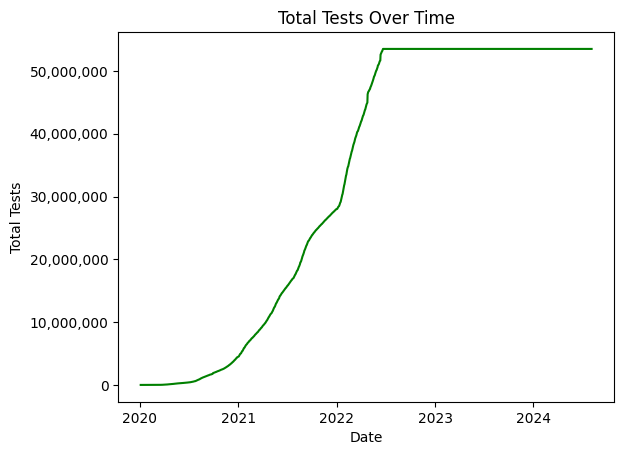

In [22]:
#time	series analysis
#Total tests Over Time
sns.lineplot(data=df, x='date', y='total_tests', color='green')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xlabel('Date')	
plt.ylabel('Total Tests')
plt.title('Total Tests Over Time')

Text(0, 0.5, 'Total Cases')

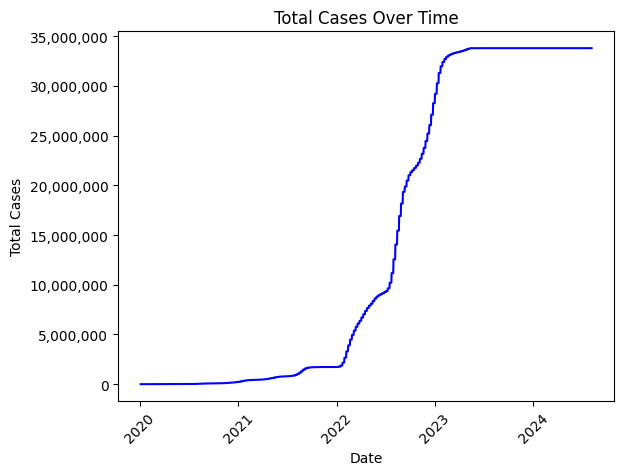

In [23]:
#Total Cases Over Time
sns.lineplot(data=df, x='date', y='total_cases', color='blue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation=45)
plt.title('Total Cases Over Time')
plt.xlabel('Date')	
plt.ylabel('Total Cases')


Text(0.5, 1.0, 'Total Deaths Over Time')

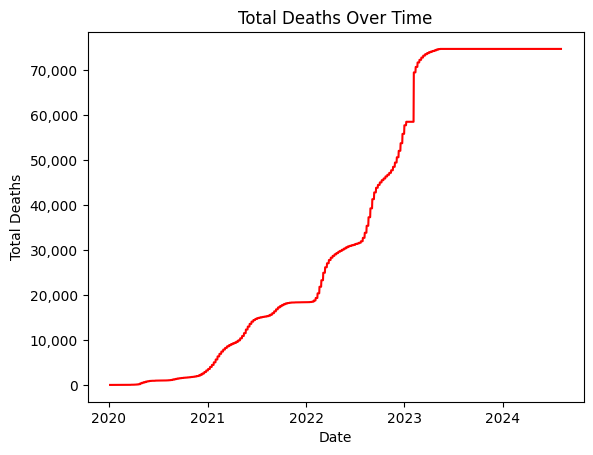

In [24]:
#total_deaths_over_time
sns.lineplot(data=df, x='date', y='total_deaths', color='red')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xlabel('Date')
plt.ylabel('Total Deaths')	
plt.title('Total Deaths Over Time')

Note: Total test > Total case > total death
1. not everyone who are tested is positive
2. not everyone who is positive is death
3. the curve form is not linear but sigmoid

action: need to visualize all of those variables in one graph to understand the relationship

Text(0.5, 1.0, 'Total Cases, Deaths, and Tests Over Time')

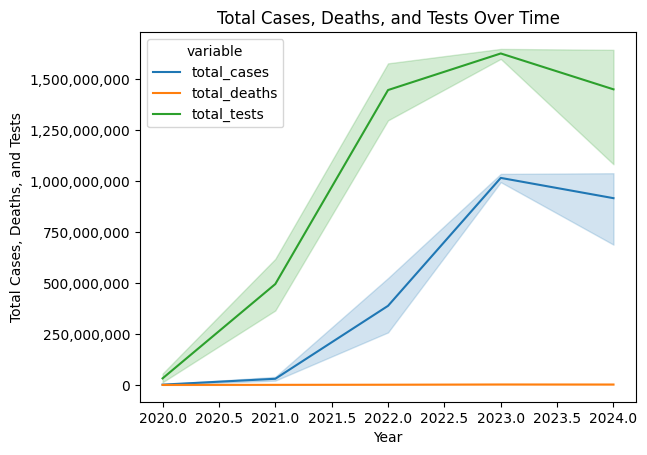

In [25]:
#Create plot to show total cases, deaths, and tests over time in one graph
#This will help to visualize the relationship between these three variables over time
test_case_and_death = df.groupby(['year', 'month'])[['total_cases', 'total_deaths', 'total_tests']].sum().reset_index()
test_case_and_death_melt	= test_case_and_death.melt(id_vars=['year', 'month'], value_vars=['total_cases', 'total_deaths', 'total_tests'], value_name='value')
sns.lineplot(data=test_case_and_death_melt, x='year', y='value', hue='variable')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xlabel('Year')
plt.ylabel('Total Cases, Deaths, and Tests')
plt.title('Total Cases, Deaths, and Tests Over Time')


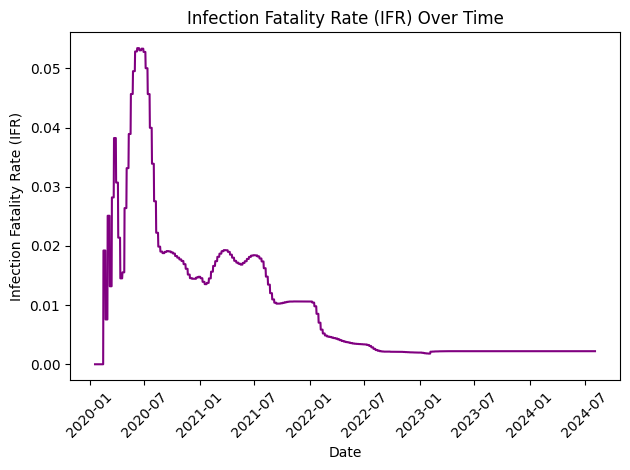

In [26]:
#creating new variable IFR (infection	fatality rate) to understand the relationship between total cases and total deaths
df['IFR'] = df['total_deaths'] / df['total_cases']
sns.lineplot(data=df, x='date', y='IFR', color='purple')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x)))
plt.xlabel('Date')
plt.ylabel('Infection Fatality Rate (IFR)')
plt.title('Infection Fatality Rate (IFR) Over Time')
plt.tight_layout()

Note: infection seems deadly at early years of pandemic then keep decraese. 
action: need to inspect what variable that contribute to ifr decreese 

Text(0.5, 1.0, 'People Vaccinated Over Time')

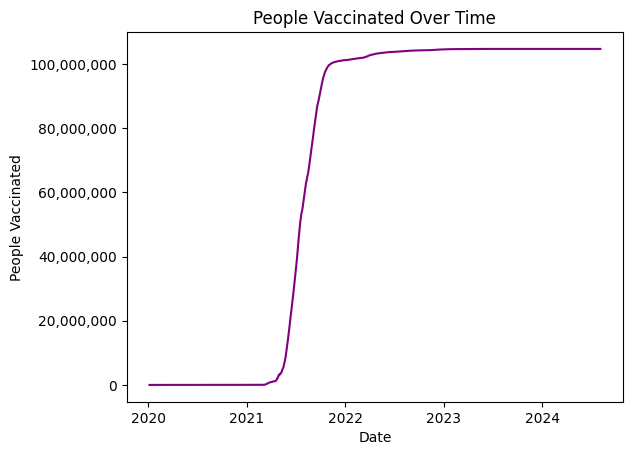

In [27]:
# inspect the relationship between ifr and	other variables like vaccination rate and stringency index
sns.lineplot(data=df, x='date', y='people_vaccinated', color='purple')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.title('People Vaccinated Over Time')

note: seems like japanese government implement vactination programs in early 2021

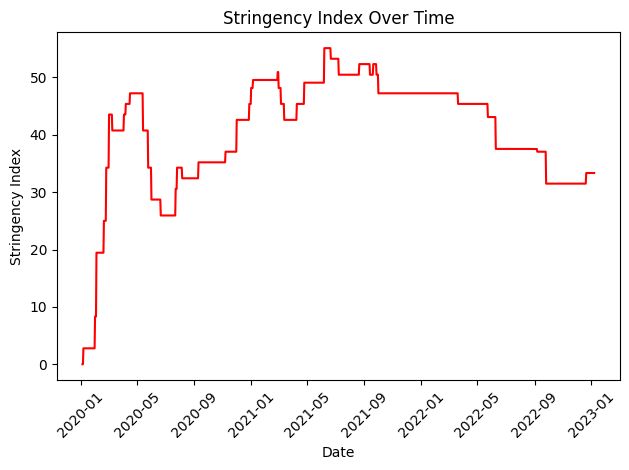

In [28]:
# inspect stringency index over time
# stringency index is a measure of government response to the pandemic
sns.lineplot(data=df, x='date', y='stringency_index', color='red')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xlabel('Date')
plt.ylabel('Stringency Index')
plt.title('Stringency Index Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

Note: The Japanese government has tightened policies related to the pandemic since the beginning of the pandemic.

In [29]:
df['perc_vaccinated_one_dose'] = (df['people_vaccinated'] / df['population']) * 100
df['IFR'] = df['IFR'] * 100		# Assuming 'ifr' is already in percentage format, if not, adjust accordingly

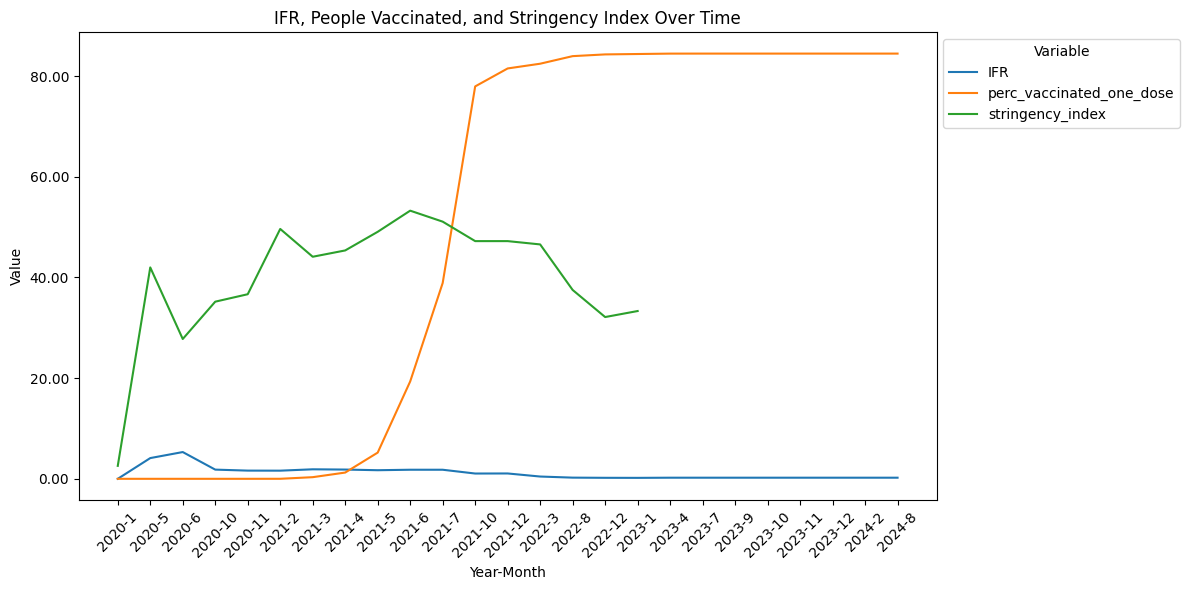

In [30]:
# inspect the relationship between ifr and other variables
# Note: infection seems deadly at early years of pandemic then keep decraese.
# action: need to inspect what variable that contribute to ifr decreese
ifr_vaccine_st = df.groupby(['year', 'month'])[['IFR', 'perc_vaccinated_one_dose', 'stringency_index']].mean().reset_index().sample(25).sort_index(ascending=True)
ifr_vaccine_st_melt = ifr_vaccine_st.melt(id_vars=['year', 'month'], value_vars=['IFR', 'perc_vaccinated_one_dose', 'stringency_index'], value_name='value')
ifr_vaccine_st_melt['year-month'] = ifr_vaccine_st_melt['year'].astype(str) + '-' + ifr_vaccine_st_melt['month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=ifr_vaccine_st_melt, x='year-month', y='value', hue='variable')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x)))
plt.xlabel('Year-Month')	
plt.ylabel('Value')
plt.title('IFR, People Vaccinated, and Stringency Index Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

note: 
- Vaccination's Dominant Impact: The most compelling insight is the strong inverse relationship between increased vaccination coverage and the dramatic reduction in IFR. This indicates that vaccination significantly lowered the fatality rate among infected individuals.

- Policy Relaxation Post-Vaccination: The easing of stringent measures (declining stringency index) largely followed the substantial increase in vaccination rates, suggesting that public health policies adapted as population immunity grew.

- Data Limitation: The plot highlights a limitation in the stringency index data beyond late 2022, meaning its long-term trend or continued influence cannot be assessed from this graph.

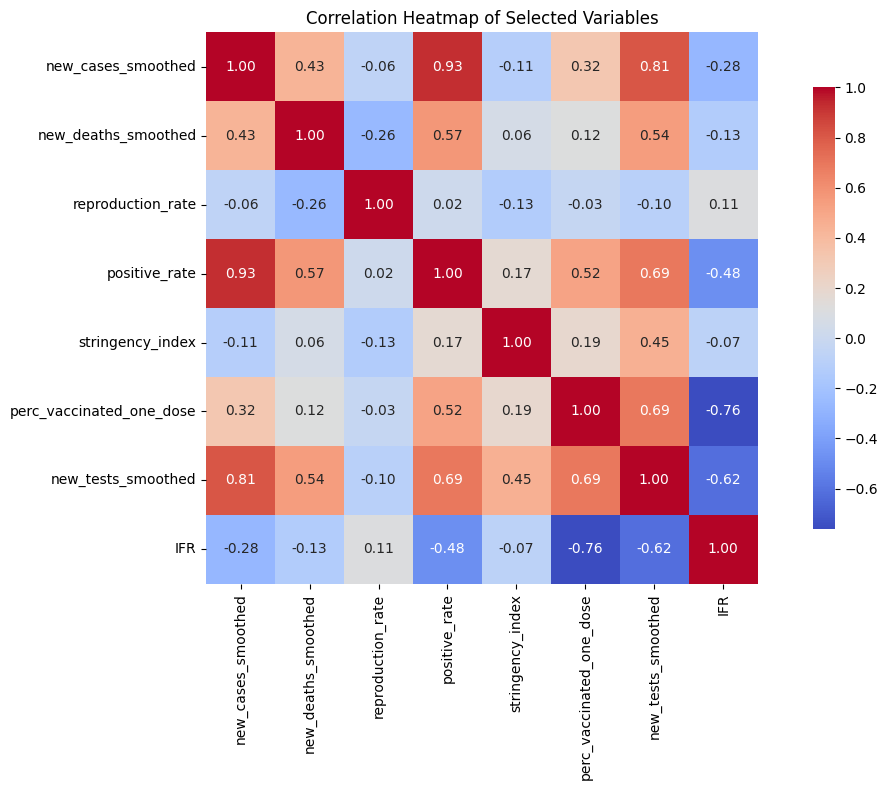

In [34]:
# Create heatmap to visualize the correlation between variables
columns_for_heatmap = [
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'reproduction_rate',
    'positive_rate',
    'stringency_index',
    'perc_vaccinated_one_dose',
    'new_tests_smoothed',
    'IFR'
]
plt.figure(figsize=(12, 8))
correlation_matrix = df[columns_for_heatmap].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Selected Variables')
plt.tight_layout()
plt.show()

This heatmap visualizes the correlation between different COVID-19 metrics. Red squares indicate a positive correlation (as one variable increases, the other tends to increase), while blue squares indicate a negative correlation (as one variable increases, the other tends to decrease). The intensity of the color and the number in the cell show the strength of the correlation, from -1 to +1.

### Strongest Correlations
- Positive Rate & New Cases (+0.93): This is a very strong positive correlation. It indicates that as the percentage of positive tests increases, the number of new smoothed cases also increases significantly. This is expected, as a higher positivity rate suggests more widespread community transmission.

- New Cases & New Tests (+0.81): A strong positive correlation exists between new smoothed cases and new smoothed tests. This suggests that an increase in testing capacity leads to the detection of more cases.

- Vaccination & IFR (-0.76): There is a strong negative correlation between the percentage of the population vaccinated with one dose (perc_vaccinated_one_dose) and the Infection Fatality Rate (IFR). This is a critical finding, strongly suggesting that as vaccination rates increase, the fatality rate from infections decreases.

- New Tests & IFR (-0.62): A strong negative correlation is seen between new_tests_smoothed and IFR. This means that as more tests are conducted, the calculated IFR tends to decrease. This is likely because increased testing detects more mild or asymptomatic cases, which increases the total number of confirmed infections without increasing the number of deaths, thus lowering the fatality ratio.

### Other Notable Correlations
- The reproduction rate and stringency index generally show weak correlations with most other variables, suggesting that their linear relationship with metrics like cases, deaths, or testing is not very strong in this dataset.

- New deaths show a moderate positive correlation with new cases (+0.43) and positive rate (+0.57), which is logical as a surge in cases and transmission typically leads to a subsequent rise in deaths.

---

## Summary of EDA Findings
This Exploratory Data Analysis (EDA) on the COVID-19 pandemic in Japan reveals several key insights into the virus's dynamics, the impact of public health interventions, and the relationships between critical metrics.

1. Pandemic Progression and Key Waves:
The time-series analysis clearly identifies distinct waves of infection throughout the pandemic. A significant, exponential surge in new_cases_smoothed beginning in early 2022 corresponds with the emergence of the highly transmissible Omicron variant.

2. Impact of Vaccination on Fatality Rate:
A strong negative correlation (-0.81) was found between the percentage of the population fully vaccinated (people_fully_vaccinated_per_hundred) and the Infection Fatality Rate (IFR). This is a primary finding, suggesting that the national vaccination campaign was highly effective in reducing the likelihood of death among confirmed cases.

3. The Role of Testing:
Increased testing, measured by new_tests_smoothed, also shows a strong negative correlation (-0.62) with the IFR. This indicates that as testing capacity expanded, more mild or asymptomatic cases were detected. This increased the total number of confirmed infections (the denominator) without a proportional rise in deaths, thereby lowering the calculated IFR.

4. Case and Transmission Dynamics:

There is a very strong positive correlation (+0.81) between the smoothed number of new cases and the test positivity rate, which is expected as widespread transmission leads to a higher percentage of positive tests.

A moderate positive correlation (+0.57) exists between the positive_rate and new_deaths_smoothed, indicating that periods of high transmission subsequently lead to an increase in fatalities.

5. Nuances in Policy and Reproduction Rate:
The correlation heatmap revealed only weak linear relationships between the stringency_index, reproduction_rate, and other key metrics. This suggests that the impact of government policies on the rate of viral transmission is complex and not easily captured by a simple linear correlation, making time-series analysis a more effective way to observe these relationships.